<a class="anchor" id="0.1"></a>
## Visualizing Multivariate Relationships 

[1. Scatter Plots with Visual Cues](#1)

[2. Grouped Box Plots](#2)

[3. Multi-dimensional Plots](#3)

Exploring multivariate relationships is an important skill to have as a data analyst or scientist. You might be familiar with univariate (one variable) and bivariate (two variables) analysis. However, datasets often contain more than two features, so it’s important to be able to explore and visualize multiple variables at a time.

In this notebook, you will learn how to visualize multivariate relationships using:
- Scatter plots with visual cues
- Grouped box plots
- Multi-dimensional plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### 1. Scatter Plots with Visual Cues <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

One way to represent multivariate relationships is to use visual cues such as colors, shapes, and sizes in a scatter plot.

#### Exercise 1
Let’s create a scatter plot using Python’s seaborn library to visualize the relationship between years of education and life expectancy.

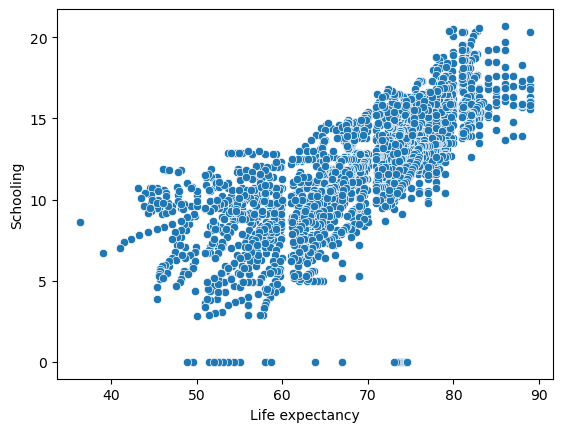

In [11]:
sns.scatterplot(data = df, x = "Life expectancy", y = "Schooling");

**It is clear from this chart that there is a positive relationship between years of schooling and life expectancy.**

#### Exercise 2
Let’s make this analysis more interesting by adding a third variable to the scatter plot using color as a visual cue. We can do this by passing in a hue argument.

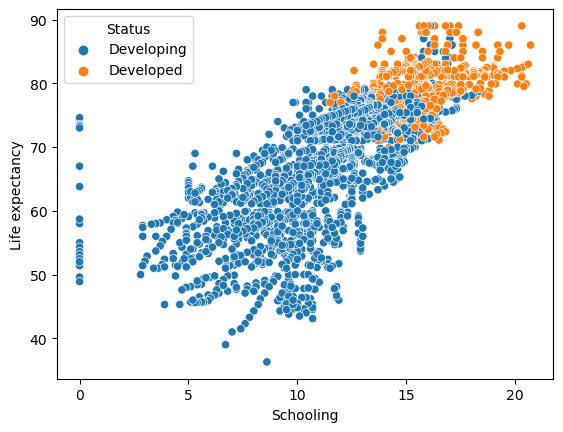

In [14]:
sns.scatterplot(data = df, x = "Schooling", y = "Life expectancy", hue = "Status");

**This multivariate visualization provides much more insight than the bivariate visualization above. For example, we can see that:**
- Years of education and life expectancy have a positive relationship
- Individuals in developed countries have more years of schooling than individuals in developing countries
- The life expectancy in developed countries is greater than the life expectancy in developing countries

#### Exercise 3
Even though it’s possible to add more variables using additional visual cues, it’s not always a great idea to do so. 

For example, let’s try adding a fourth variable to this visualization using shapes as a visual cue.

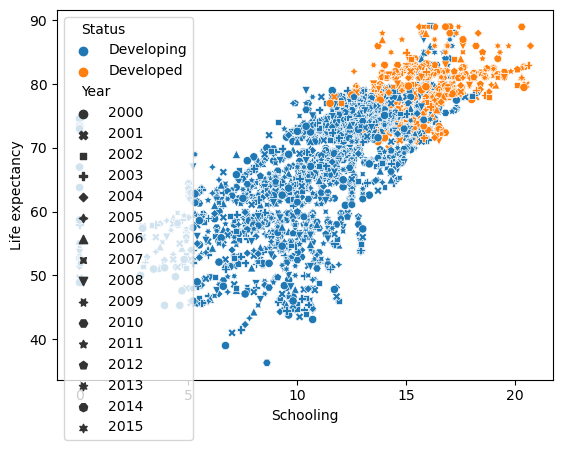

In [20]:
sns.scatterplot(data = df, x = "Schooling", y = "Life expectancy", hue = "Status", style = "Year");

**This chart is overloaded with information and is difficult to read. You always want to make sure your charts are readable and easy to interpret. Generally, anything beyond three variables in a scatter plot is probably too much for the human eye to process.**

### 2. Grouped Box Plots <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Grouped box plots can be used to visualize two categorical variables and a quantitative variable. Having the box plots side-by-side can help you gain useful insights.

#### Exercise 1
For example, let’s create a box plot to show the relationship between status and life expectancy.

<AxesSubplot:xlabel='Status', ylabel='Life expectancy'>

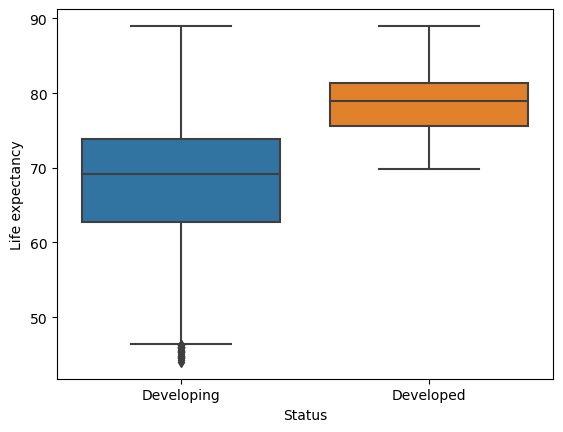

In [84]:
sns.boxplot(data = df, x = "Status", y = "Life expectancy")

#### Exercise 2
Let’s take it a step further to see whether life expectancy has changed over the years. We can use the argument hue to group by gender.

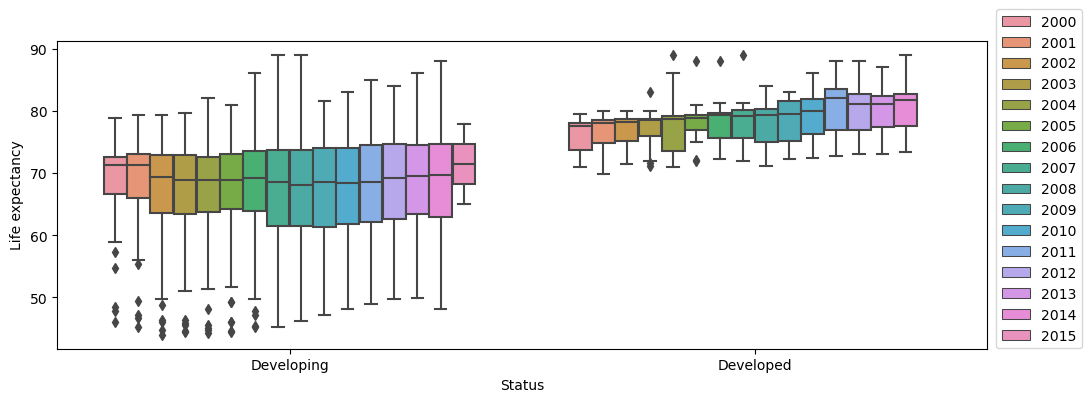

In [99]:
plt.figure(figsize=(12, 4))
sns.boxplot(data = df, x = "Status", y = "Life expectancy", hue = "Year")
plt.legend(loc =(1.01,0.001));

### 3. Multi-dimensional Plots <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

Another way to represent multivariate relationships is to use multi-dimensional plots. For example, if we want to represent three variables in a dataset we can create a 3D scatter plot.

We will use the Python graphing library Plotly to load in a dataset and create an interactive 3D plot.

#### Exercise 1
Let’s load in the iris dataset and visualize the relationship between `sepal_length`,`sepal_width` , and `petal_width` for three different iris species.

In [100]:
import plotly.express as px
df = px.data.iris()

In [103]:
fig = px.scatter_3d(df, x = "sepal_length", y = "sepal_width", z = "petal_width", color = "species")
fig.show()

**Notice how there are now three axes instead of two, allowing you to see your data in a new dimension.**

**3D plots allow you to see relationships that might not be visible in 2D, such as clusters. Interactive graphing libraries such as Plotly allow you to rotate the plot to see points from different angles and zoom into specific areas of interest.**

**The downside of 3D plots is that they can be difficult to read in two dimensions. That means that if you need to write a paper report, a 3D plot might not be the best idea.**

------